# PWM of a signal
## Encode signal (amplitude of sinusoid) as the duty cycle of the PWM

In [1]:
from scipy import signal
from scipy.fft import fft, fftfreq

from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://www.dropbox.com/s/3aoexl8vxyitmds/basic_material.py?dl=0
%run basic_material

Running Python: 3.8.17
Running Sympy: 1.12rc1


In [2]:
N = 2**13
t = np.linspace(0, 1, N, endpoint=False)
dt = t[1] - t[0]
fs = 1/dt # high rate - effectively cts 
f_pwm = 50 # lower rate used by TX/RC - CPUS use 490Hz

# Freq of signal to transmit
f0 = 11 # Hz

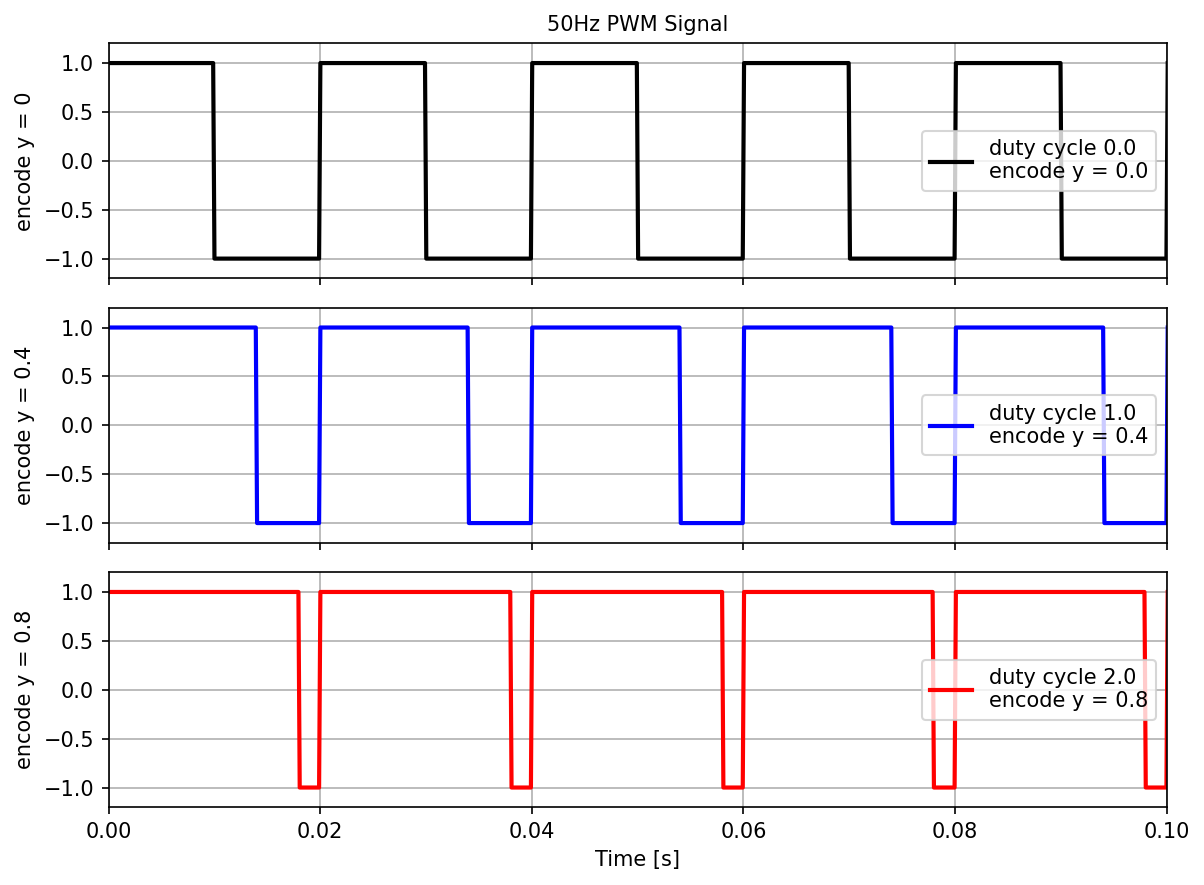

In [3]:
fig,ax = plt.subplots(3,1,figsize=(8,6),sharex=True)
for kk,ii in enumerate([0.5,0.7,0.9]):
    ax[kk].plot(t, signal.square(2 * np.pi * f_pwm * t, duty=ii),'m',label=f"duty cycle {kk:.1f}\nencode y = {(ii-0.5)/0.5:.1f}",color=colors[kk])
    ax[kk].set_ylim(-1.2, 1.2)
    ax[kk].set_xlim(0, 0.1)
    ax[kk].legend(facecolor='w')
ax[2].set_xlabel('Time [s]')
ax[0].set_ylabel('encode y = 0')
ax[1].set_ylabel('encode y = 0.4')
ax[2].set_ylabel('encode y = 0.8')
ax[0].set_title('50Hz PWM Signal')
plt.show()
fig.savefig('./figs/PWM1.png', dpi=300)

## Encode Time-varying Signal

In [4]:
sig = 0.4*np.sin(2 * np.pi * f0 * t) + 0.5
sig_scaled = (sig + 1)/2 # scale/shift to 0.5-1

# PWM of signal
pwm = 0.5*signal.square(2 * np.pi * f_pwm * t, duty=sig_scaled) + 0.5
# ref PWM
pwm_zero = 0.5*signal.square(2 * np.pi * f_pwm * t, duty=0.5) + 0.5

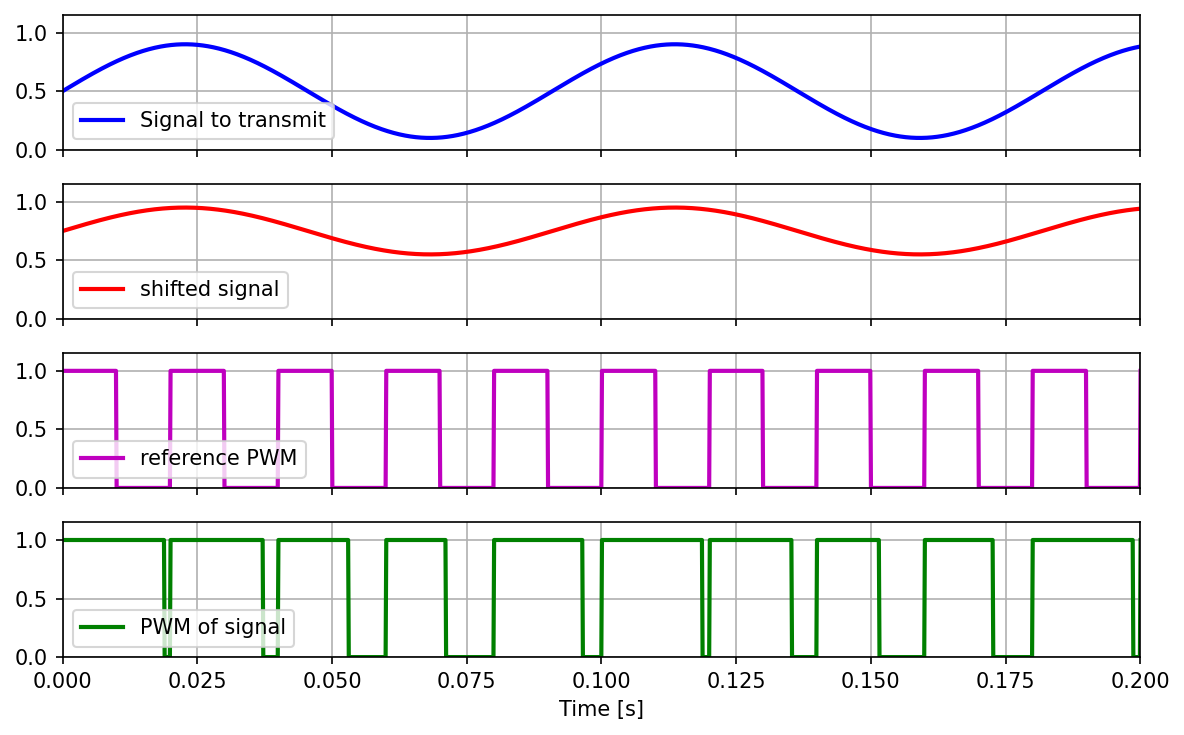

In [5]:
fig, ax = plt.subplots(4,1,figsize=(8,5),sharex=True)
ax[0].plot(t, sig, 'b')
ax[0].set_xlim(0, 0.2)
ax[0].set_ylim(0, 1.15)
ax[1].plot(t, sig_scaled,'r-')
ax[0].legend(['Signal to transmit','shifted signal'])
ax[1].legend(['shifted signal'])
ax[1].set_ylim(0, 1.15)
ax[3].plot(t, pwm,'g-')
ax[2].set_ylim(0, 1.15)
ax[2].plot(t, pwm_zero,'m-')
ax[3].set_ylim(0, 1.15)
ax[2].legend(['reference PWM'],loc='best')
ax[3].legend(['PWM of signal','reference PWM'],loc='best')
plt.xlabel('Time [s]')
plt.show()
fig.savefig('./figs/PWM2.png', dpi=300)

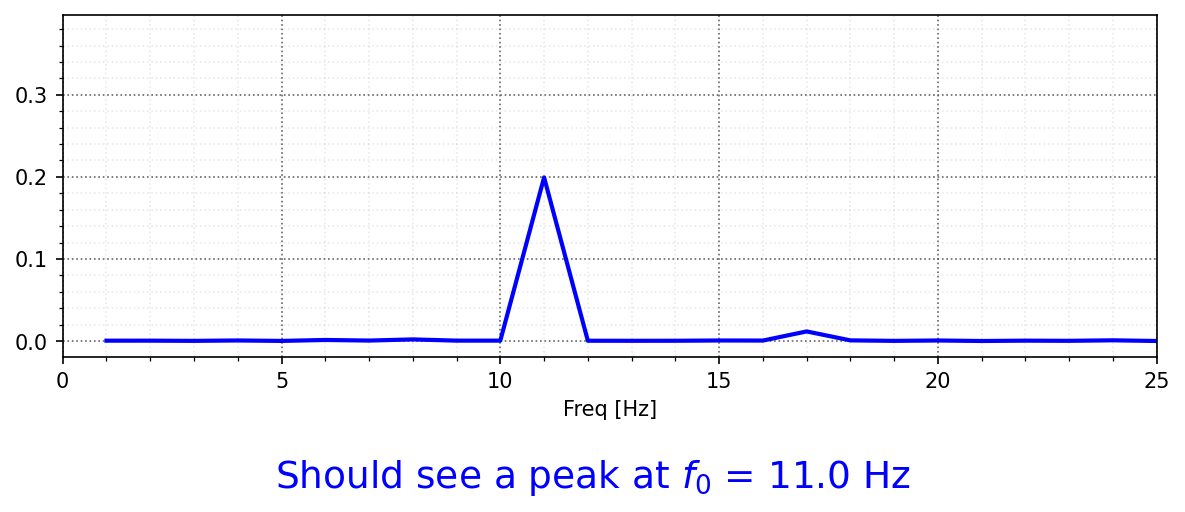

In [6]:
# Check freq content of the PWM signal
yf = fft(pwm)
ff = fftfreq(N, 1/fs)[1:N//2]

fig, ax = plt.subplots(figsize=(8,3))
plt.plot(ff, 2.0/N * np.abs(yf[1:N//2]),'b')
plt.xlim([0, f_pwm/2])
nicegrid()
plt.xlabel('Freq [Hz]')
caption(f'Should see a peak at $f_0$ = {f0:.1f} Hz',fig)
fig.savefig('./figs/PWM3.png', dpi=300)
plt.show()